In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn import model_selection
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

In [406]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

In [407]:
# input
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'
PREP_DATASET_PATH ='course_project_train_prep.csv'
PREP_DATASET_TRARGET_PATH = 'course_project_train_prep_target.csv'


In [408]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)
df_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [409]:
df_train.shape

(7500, 17)

In [410]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [411]:
df_train['ID'] = df_train.index.tolist()

In [412]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()


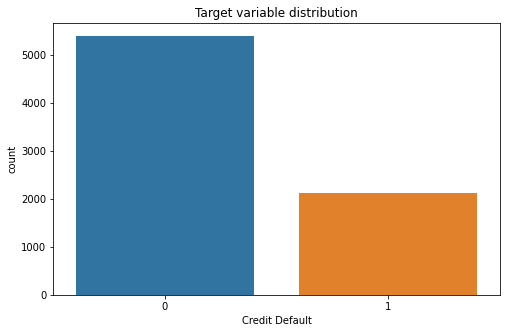

In [413]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df_train)

plt.title('Target variable distribution')
plt.show()

In [414]:
df_train.loc[df_train['Years in current job'].isnull(), 'Years in current job'] = 'NaN'

In [415]:
pd.crosstab(df_train['Years in current job'], df_train['Credit Default'])

Credit Default           0    1
Years in current job           
1 year                 362  142
10+ years             1688  644
2 years                512  193
3 years                450  170
4 years                338  131
5 years                371  145
6 years                302  124
7 years                285  111
8 years                247   92
9 years                194   65
< 1 year               404  159
NaN                    234  137

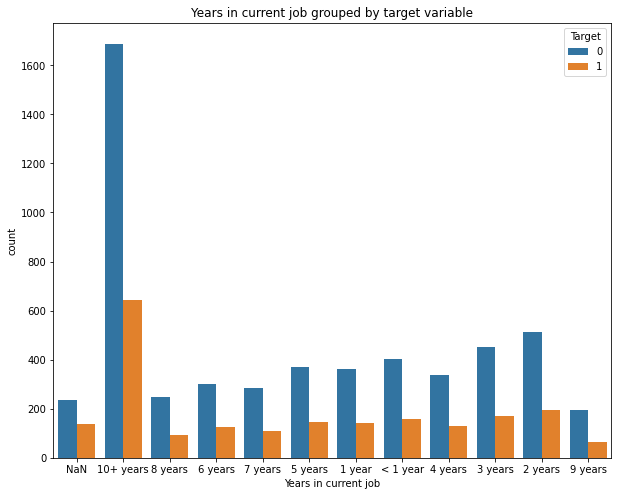

In [416]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years in current job", hue=TARGET_NAME, data=df_train)
plt.title('Years in current job grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–µ—Ñ–æ–ª—Ç–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —á–∏—Å–ª–∞ –ª–µ—Ç —Ä–∞–±–æ—Ç—ã

In [417]:
df_train[['Years in current job', 'Credit Default']].groupby('Years in current job').mean()

Credit Default
Years in current job                
1 year                      0.281746
10+ years                   0.276158
2 years                     0.273759
3 years                     0.274194
4 years                     0.279318
5 years                     0.281008
6 years                     0.291080
7 years                     0.280303
8 years                     0.271386
9 years                     0.250965
< 1 year                    0.282416
NaN                         0.369272

**–ù–∞–±–ª—é–¥–µ–Ω–∏–µ**

–ò–∑—É—á–∏–≤ –ø–æ–ª—É—á–∏–≤—à–µ–π—Å—è —Ç–∞–±–ª–∏—Ü—ã –≥—Ä–∞—Ñ–∏–∫, –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫—Ä–æ–º–µ Nan  –ø—Ä–∏–∑–Ω–∞–∫–∞ Years in current job –∏–º–µ—é—Ç —Å—Ö–æ–∂–∏–µ –¥–æ–ª–∏ –≤ —Ä–∞–∑—Ä–µ–∑–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ï—Å–ª–∏ —ç—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ç–∞–∫, —Ç–æ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç, –Ω–∞–ø—Ä–∏–º–µ—Ä, –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –∏—Ö –≤ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é.

**–ì–∏–ø–æ—Ç–µ–∑–∞** 

* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\normalsize \alpha$: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è


In [418]:
names=df_train['Years in current job'].unique()[1:]

In [419]:
years_and_target_s = df_train.loc[df_train['Years in current job'].isin(names), ['ID','Years in current job', 'Credit Default']].sample(1000)

In [420]:
table = years_and_target_s.pivot_table(values='ID', index='Years in current job', columns='Credit Default', aggfunc='count')
table

Credit Default          0    1
Years in current job          
1 year                 57   13
10+ years             231  100
2 years                59   30
3 years                71   26
4 years                44   14
5 years                47   16
6 years                35   25
7 years                42   19
8 years                37   11
9 years                30   10
< 1 year               61   22

In [421]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.2565170401347529

P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –¥–ª—è –æ—Ç–≤–µ—Ä–∂–µ–Ω–∏—è –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –∏ –º–æ–∂–Ω–æ –¥–æ–ø—É—Å—Ç–∏—Ç—å, —á—Ç–æ –≤—Å–µ –Ω–µ–ø—É—Å—Ç—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ Years in current job –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –∏—Ö –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é, –≤—ã–¥–µ–ª–∏–≤ NaN –≤ –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ (—É—Å–ª–æ–≤–Ω–æ –ø—Ä–∏–Ω—è–≤ NaN = is_employed=0, –æ—Å—Ç–∞–ª—å–Ω—ã–µ is_employed=1). 

In [422]:
df_train.loc[df_train['Years in current job']!='NaN', 'Years in current job'] = 1

In [423]:
df_train.loc[df_train['Years in current job']=='NaN', 'Years in current job'] = 0

–ò–∑—É—á–∏–º –ø—Ä–∏–∑–Ω–∞–∫ Home Ownership

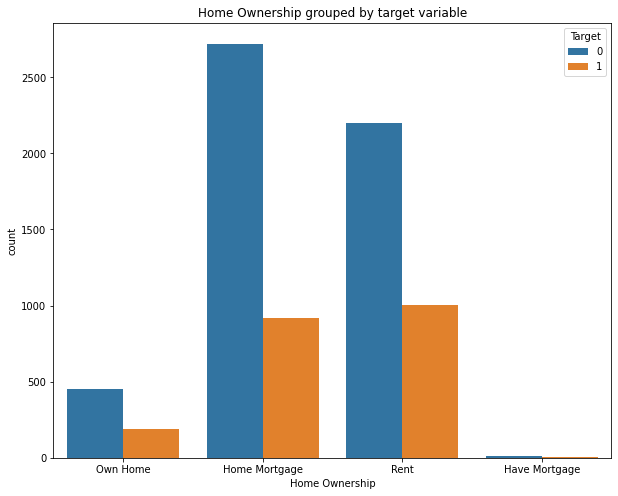

In [424]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home Ownership", hue=TARGET_NAME, data=df_train)
plt.title('Home Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–µ—Ñ–æ–ª—Ç–∞ –æ—Ç –≤–ª–∞–¥–µ–Ω–∏—è –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å—é Home Ownership

In [425]:
df_train[['Home Ownership', 'Credit Default']].groupby('Home Ownership').mean()

Credit Default
Home Ownership                
Have Mortgage         0.166667
Home Mortgage         0.251856
Own Home              0.296754
Rent                  0.313046

–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Ä–∞–∑–ª–∏—á–∏–µ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ Home Ownership

**–ì–∏–ø–æ—Ç–µ–∑–∞** 

* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\normalsize \alpha$: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

In [426]:
#names=df_train['Home Ownership'].unique()
names=['Have Mortgage',
       'Home Mortgage',
       'Own Home', 
       'Rent']
homeownership_and_target_s = df_train.loc[df_train['Home Ownership'].isin(names), ['ID','Home Ownership', 'Credit Default']].sample(1000)

In [427]:
table = homeownership_and_target_s.pivot_table(values='ID', index='Home Ownership', columns='Credit Default', aggfunc='count', fill_value=0)
table

Credit Default    0    1
Home Ownership          
Home Mortgage   373  120
Own Home         52   28
Rent            302  125

In [428]:
chi2, p, dof, expected = chi2_contingency(table[1:], correction=False)
p

0.3058724762822042

P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –º–µ–Ω—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —Ä–∞–∑–ª–∏—á–∏—è –≤ –∑–Ω–∞—á–µ–Ω–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ Home Ownership —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã

–ò–∑—É—á–∏–º –ø—Ä–∏–∑–Ω–∞–∫ Purpose

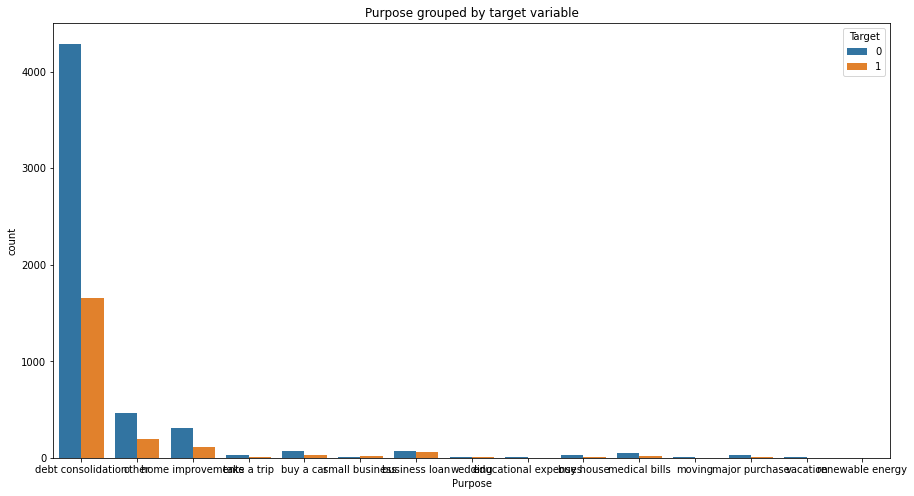

In [429]:
plt.figure(figsize=(15, 8))

sns.countplot(x="Purpose", hue=TARGET_NAME, data=df_train)
plt.title('Purpose grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–µ—Ñ–æ–ª—Ç–∞ –æ—Ç —Ü–µ–ª–∏ –∫—Ä–µ–¥–∏—Ç–∞

In [430]:
df=df_train[['Purpose', 'Credit Default']].groupby('Purpose').mean()
df=df.sort_values(by='Credit Default')
df

Credit Default
Purpose                             
educational expenses        0.100000
moving                      0.181818
major purchase              0.225000
buy a car                   0.250000
vacation                    0.250000
home improvements           0.262136
buy house                   0.264706
wedding                     0.266667
take a trip                 0.270270
debt consolidation          0.278264
other                       0.296241
medical bills               0.309859
business loan               0.426357
small business              0.538462
renewable energy            1.000000

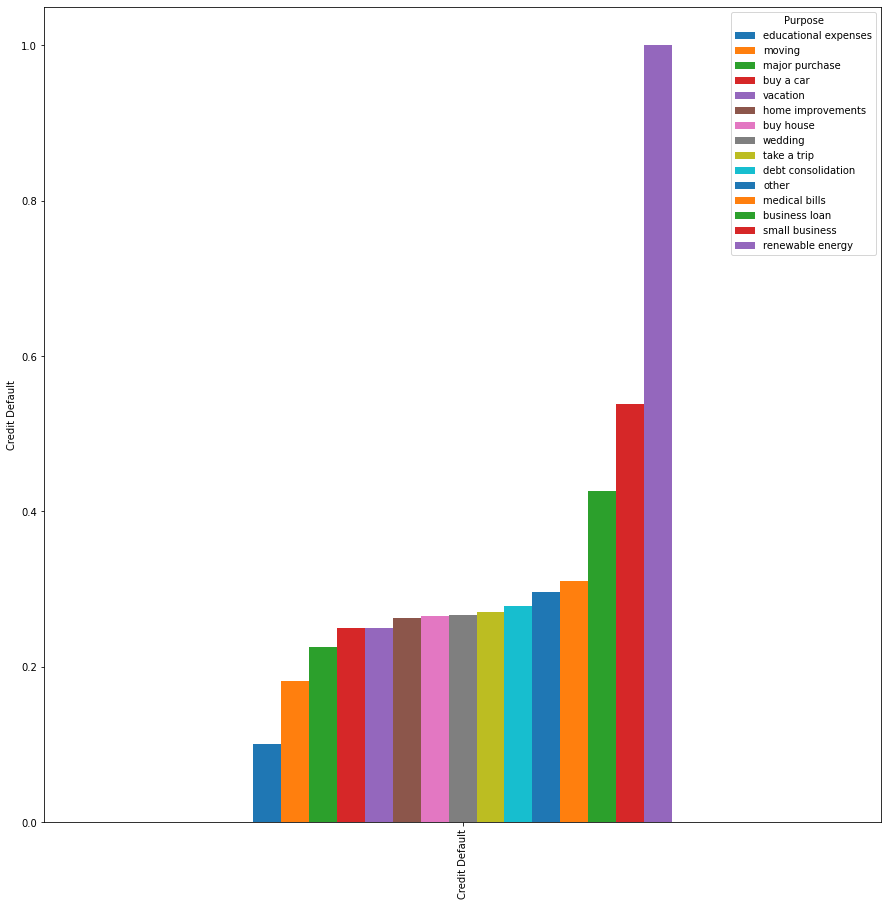

In [431]:
ax = df.T.plot(kind='bar', figsize=(15,15))
ylab = ax.set_ylabel('Credit Default')

–ù–∞–±–ª—é–¥–µ–Ω–∏–µ

–ò–∑—É—á–∏–≤  –≥—Ä–∞—Ñ–∏–∫, –≤–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ –≤ –≥—Ä—É–ø–ø—Ü other —å–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥–æ–±–∞–≤–∏—Ç—å —Ä—è–¥ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–µ—Ñ–æ–ª—Ç–∞ –ø–æ –∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∏–º–µ—Ä–Ω–æ 0,25.

–ì–∏–ø–æ—Ç–µ–∑–∞

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ–∂–∏–¥–∞–µ–º—ã–µ –∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω—ã
–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —á–∞—Å—Ç–æ—Ç–∞—Ö –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö –∫–æ–ª–µ–±–∞–Ω–∏–π, —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã
–ö—Ä–∏—Ç–µ—Ä–∏–π: –•–∏-–∫–≤–∞–¥—Ä–∞—Ç –ü–∏—Ä—Å–æ–Ω–∞
–£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏  ùõº : 0.05
–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

In [432]:
names = ['debt consolidation', 
         'other', 
         'home improvements', 
         'take a trip',         
         'buy a car', 
         #'small business', 
         #'business loan', 
         'wedding',
         #'educational expenses', 
         'buy house', 
         'medical bills', 
         #'moving',
         'major purchase', 
         'vacation', 
         #'renewable energy'
         ]

In [433]:
purpose_target_s = df_train.loc[df_train['Purpose'].isin(names), ['ID','Purpose', 'Credit Default']].sample(1000)

In [434]:
table = purpose_target_s.pivot_table(values='ID', index='Purpose', columns='Credit Default', aggfunc='count', fill_value=0)
table

Credit Default        0    1
Purpose                     
buy a car            10    5
buy house             3    0
debt consolidation  587  234
home improvements    38    9
major purchase        2    1
medical bills         6    5
other                61   26
take a trip           5    0
vacation              3    1
wedding               3    1

In [435]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.6272524615118975

P-value –ø–æ–ª—É—á–∏–ª–æ—Å—å –±–æ–ª—å—à–µ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –º–æ–∂–æ –æ–±—ä–µ–¥–∏–∏—Ç—å –≤—ã–±—Ä–∞–Ω–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏–∏ –≤ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫

In [436]:
df_train.loc[df_train['Purpose'].isin(names), 'Purpose'] = 'other'

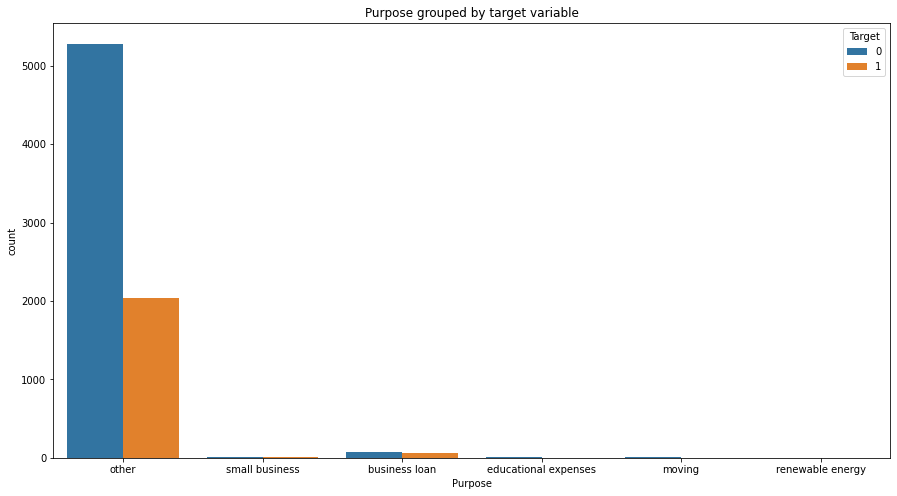

In [437]:
plt.figure(figsize=(15, 8))

sns.countplot(x="Purpose", hue=TARGET_NAME, data=df_train)
plt.title('Purpose grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [438]:
df=df_train[['Purpose', 'Credit Default']].groupby('Purpose').mean()
df=df.sort_values(by='Credit Default')
df

Credit Default
Purpose                             
educational expenses        0.100000
moving                      0.181818
other                       0.278476
business loan               0.426357
small business              0.538462
renewable energy            1.000000

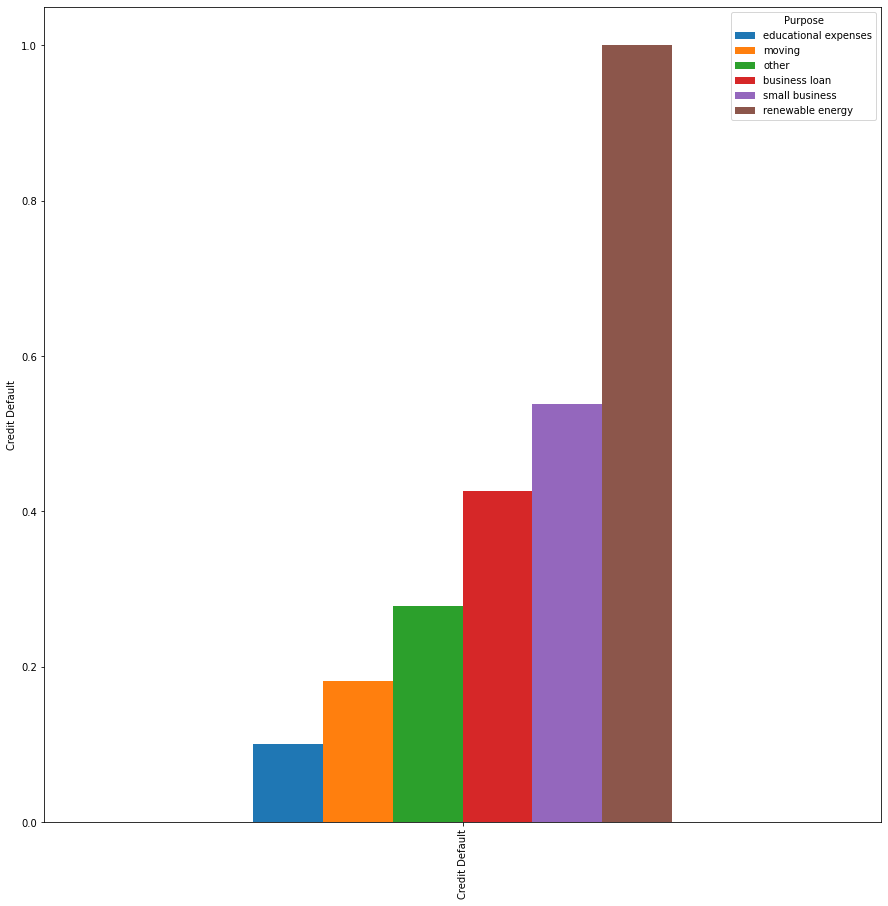

In [439]:
ax = df.T.plot(kind='bar', figsize=(15,15))
ylab = ax.set_ylabel('Credit Default')

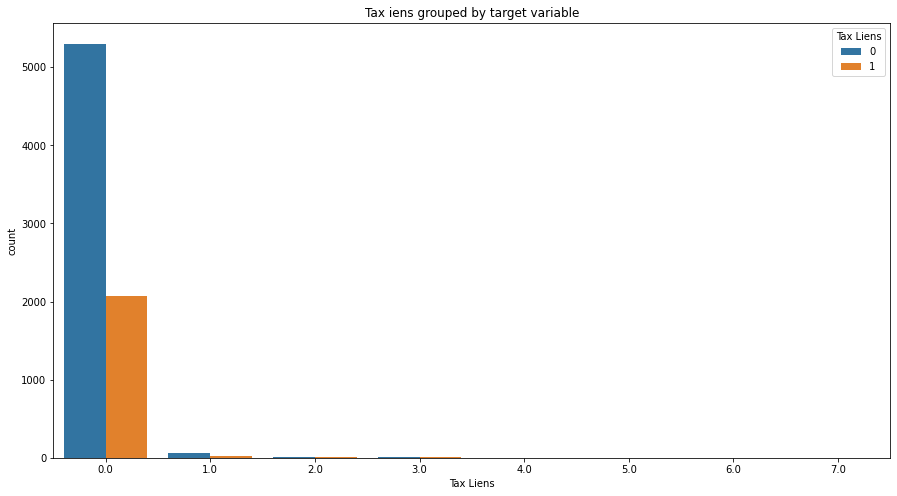

In [476]:
plt.figure(figsize=(15, 8))

sns.countplot(x="Tax Liens", hue=TARGET_NAME, data=df_train)
plt.title('Tax iens grouped by target variable')
plt.legend(title='Tax Liens', loc='upper right')

plt.show()

In [472]:
df=df_train[['Tax Liens', 'Credit Default']].groupby('Tax Liens').mean()
df=df.sort_values(by='Credit Default')
df

Credit Default
Tax Liens                
6.0              0.000000
7.0              0.000000
0.0              0.280342
1.0              0.289157
2.0              0.500000
3.0              0.500000
4.0              0.500000
5.0              0.500000

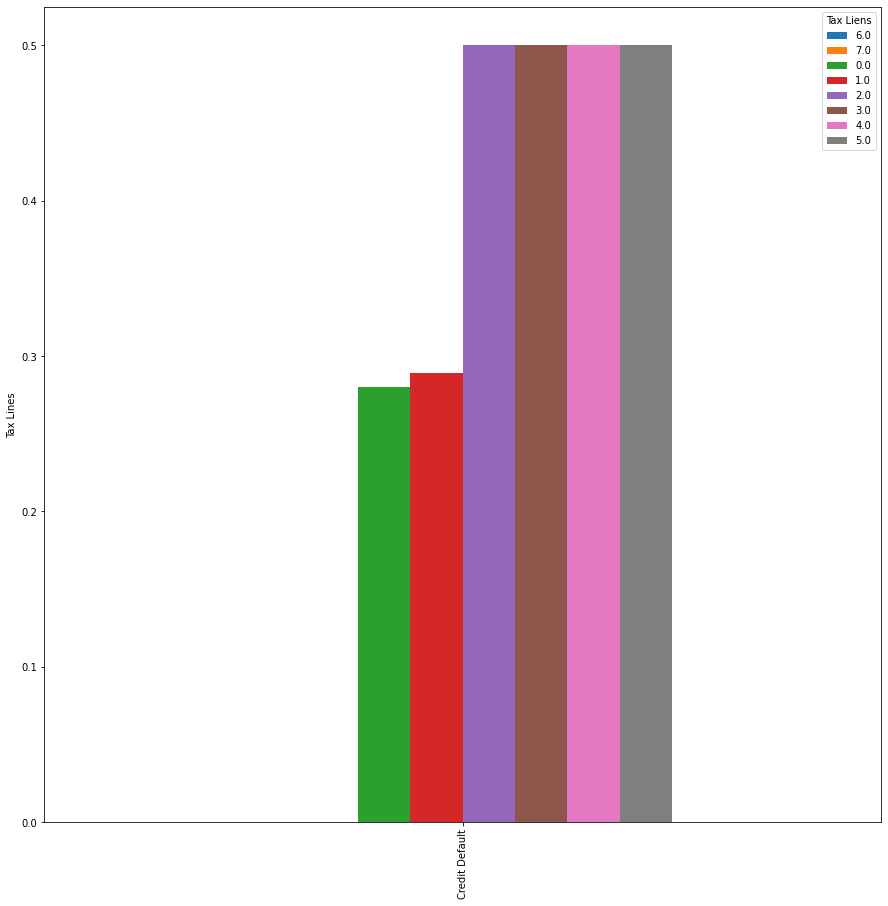

In [473]:
ax = df.T.plot(kind='bar', figsize=(15,15))
ylab = ax.set_ylabel('Tax Lines')

In [440]:
#df_train.loc[df_train['Months since last delinquent'].isnull(), 'Months since last delinquent'] = 'NaN'

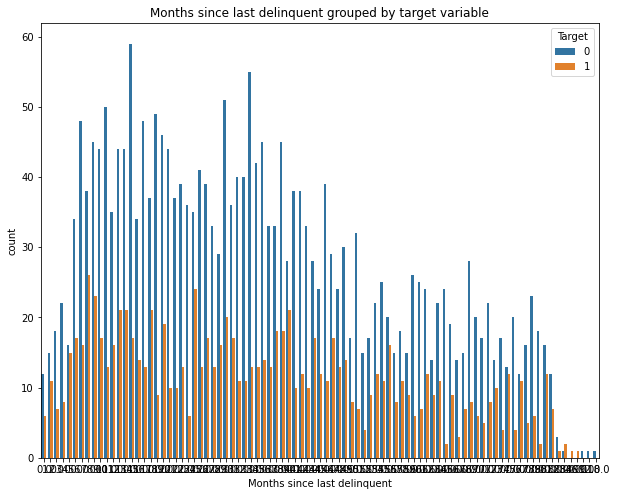

In [441]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Months since last delinquent", hue=TARGET_NAME, data=df_train)
plt.title('Months since last delinquent grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [442]:
table = pd.pivot_table (df_train, values='Credit Default', index='Months since last delinquent',  aggfunc='mean' )

–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ –¥–µ—Ñ–æ–ª—Ç–∞ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –º–µ—Å—è—Ü–µ–≤ delinquent

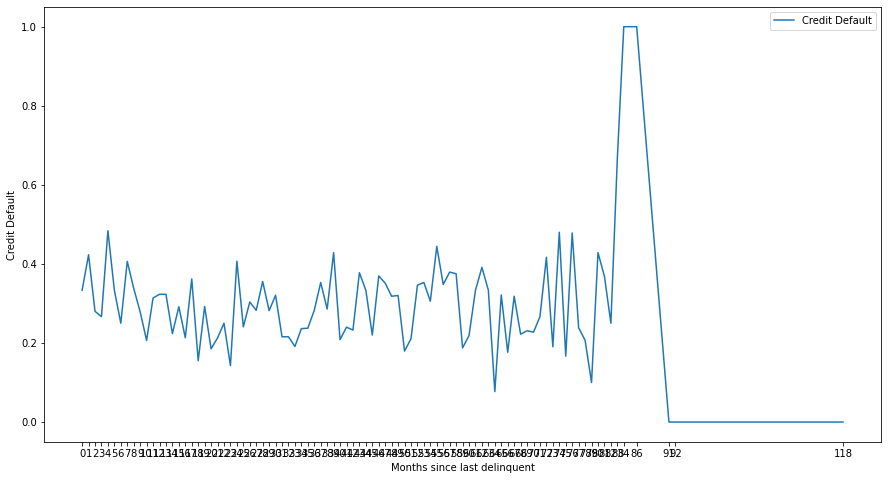

In [443]:
ax = table.plot(xticks=table.index, figsize=(15,8))
ylab = ax.set_ylabel('Credit Default')


–í—ã–≤–æ–¥. –ü–æ–∫–∞ –Ω–∏–∫–∞–∫–æ–π –∫–æ–Ω–∫—Ä–µ—Ç–∏–∫–∏ –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É –Ω–µ —Å–ª–æ–∂–∏–ª–æ—Å—å. –°–∫–ª–æ–Ω—è—é—Å—å –∫ —Ç–æ–º—É, —á—Ç–æ–±—ã –µ–≥–æ —É–¥–∞–ª–∏—Ç—å. 

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞  Number of Open Accounts –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ  

<AxesSubplot:xlabel='Number of Open Accounts'>

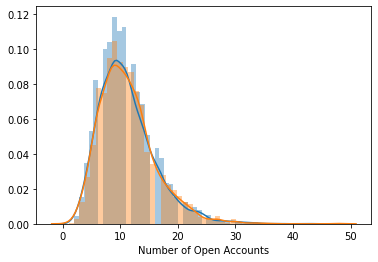

In [444]:
sns.distplot(df_train['Number of Open Accounts'])
sns.distplot(df_test['Number of Open Accounts'])

–í—ã–≤–æ–¥ - —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏ –∏–º–µ—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç –æ–¥–Ω–æ–π –≥–µ–Ω–µ—Ä–∞–ª—å–Ω–æ–π —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞ Number of Open Accounts –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö

<AxesSubplot:xlabel='Number of Open Accounts'>

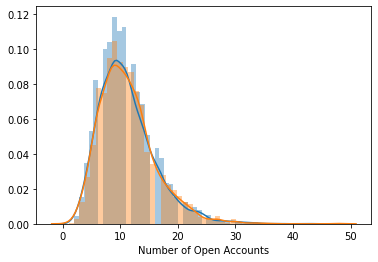

In [445]:
sns.distplot(df_train['Number of Open Accounts'])
sns.distplot(df_test['Number of Open Accounts'])

–í—ã–≤–æ–¥ - —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∏ –∏–º–µ—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç –æ–¥–Ω–æ–π –≥–µ–Ω–µ—Ä–∞–ª—å–Ω–æ–π —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏

–ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ Credit Score

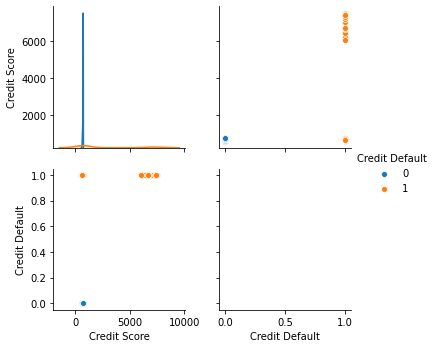

In [446]:
sns.pairplot(df_train.loc[:, ['Credit Score', 'Credit Default']], hue='Credit Default')

–í—ã–≤–æ–¥: –í–∏–¥–Ω–æ, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–º–µ—é—Ç 2 —Ä–∞–∑–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ü—Ä–∏ –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π  Credut Default =1, –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–ª–æ—Ç–Ω–æ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω—ã –æ–∫–æ–ª–æ —Å–µ—Ä–µ–¥–Ω–µ–≥–æ

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ Credit Default = 1

<AxesSubplot:xlabel='Credit Score'>

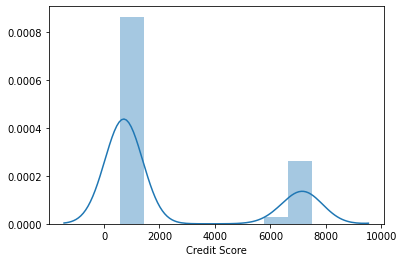

In [447]:
df_defaul1=df_train[df_train['Credit Default']==1]
df_defaul0=df_train[df_train['Credit Default']==0]
sns.distplot(df_defaul1[pd.notnull(df_defaul1['Credit Score'])]['Credit Score'])

–î–≤–∞ –ø–∏–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –º–æ–∂–µ—Ç –≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ–± –æ—à–∏–±–∫–µ –≤–≤–æ–¥–∞ –¥–∞–Ω–Ω—ã—Ö 

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è =0

<AxesSubplot:xlabel='Credit Score'>

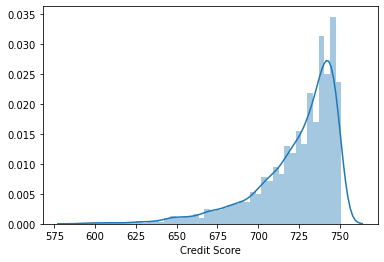

In [448]:
sns.distplot(df_defaul0[pd.notnull(df_defaul0['Credit Score'])]['Credit Score'])

–í—ã–≤–æ–¥: –í—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è =0 –º–µ–Ω—å—à–µ 750

In [449]:
df_train.loc[df_train['Credit Score']>4000, 'Credit Score'] = df_train['Credit Score']/10

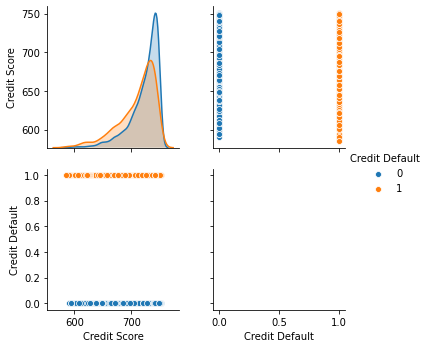

In [450]:
sns.pairplot(df_train.loc[:, ['Credit Score', 'Credit Default']], hue='Credit Default')

In [456]:
df_train1=df_train.loc[df_train['Credit Score'].notnull()]

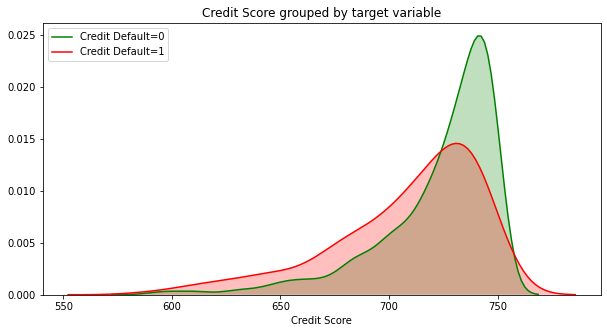

In [457]:
credit_score_with_target_s = df_train1[['Credit Score', TARGET_NAME]].sample(1000)
credit_score_s = credit_score_with_target_s['Credit Score']
credit_score_target_0 = credit_score_s[credit_score_with_target_s[TARGET_NAME] == 0]
credit_score_target_1 = credit_score_s[credit_score_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(credit_score_target_0, shade=True, label='Credit Default=0', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='Credit Default=1', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target variable')
plt.show()

**–ù–∞–±–ª—é–¥–µ–Ω–∏–µ**

–ü–æ—Ö–æ–∂–µ —á—Ç–æ –¥–≤–µ –≥—Ä—É–ø–ø—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–∑–±–∏–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ "Credit Score" –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∏–º–µ—é—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏, —Ç.–∫. —ç—Ç–æ –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–æ–º "Credit Score" –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –≤–æ–∑–º–æ–∂–Ω–æ, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä–∞—è —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

**–ì–∏–ø–æ—Ç–µ–∑–∞** 
* –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–≤–Ω—ã
* –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–≤—É—Ö –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è
* –ö—Ä–∏—Ç–µ—Ä–∏–π: –∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞ (t-—Ç–µ—Å—Ç) –∏ –µ–≥–æ –∞–Ω–∞–ª–æ–≥–∏
* –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\normalsize \alpha$: 0.05
* –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å: –¥–≤—É—Ö—Å—Ç–æ—Ä–æ–Ω–Ω—è—è

–ß—Ç–æ –±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É —Å—Ä–∞–≤–Ω–∏–º –¥–≤–µ –≤—ã–±–æ—Ä–∫–∏ –∏–∑ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö –≥—Ä—É–ø–ø –Ω–∞ –ø—Ä–µ–¥–º–µ—Ç —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.
–ï—Å–ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—è –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –≥—Ä—É–ø–ø–∞—Ö —Ä–∞–≤–Ω—ã, –ø—Ä–∏ –¥–∞–Ω–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö, –±—É–¥–µ –º–µ–Ω–µ–µ 5%, —Ç–æ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Ç–æ–º, —á—Ç–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –≤—ã–±–æ—Ä–∫–∏ –∏–º–µ—é—Ç —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–ü—Ä–≤–µ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å

In [458]:
shapiro(credit_score_s)

(0.8365654349327087, 8.375368097348898e-31)

–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é p-value, –∫–æ—Ç–æ—Ä–æ–µ —Å–∏–ª—å–Ω–æ –º–µ–Ω—å—à–µ 0.05, –º–æ–∂–µ–º –∑–∞–∫–ª—é—á–∏—Ç—å, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ "–Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏" –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è.

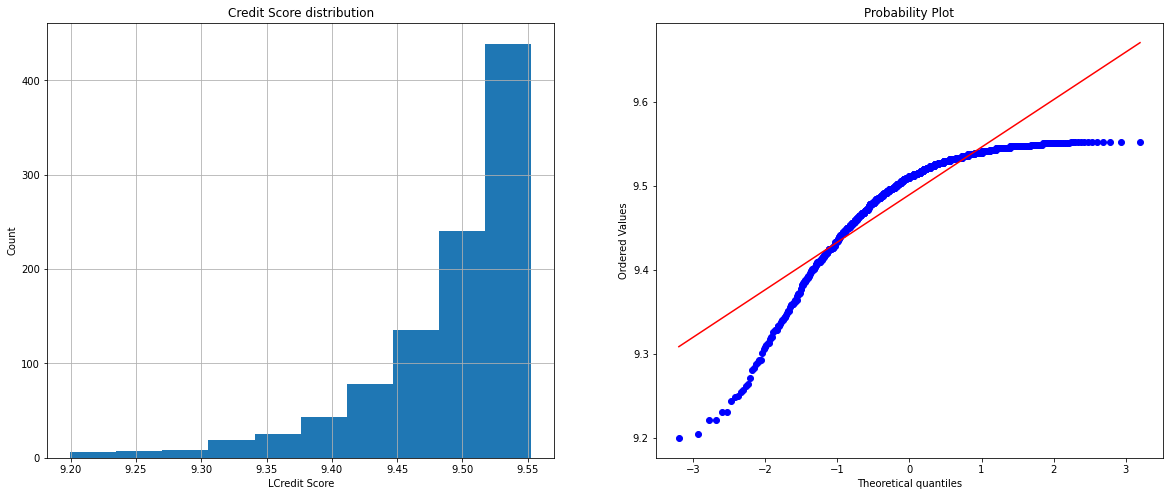

In [460]:
credit_score_log=np.log(credit_score_s)/np.log(2)


plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LCredit Score')
ax1.set_ylabel('Count')
ax1.set_title('Credit Score distribution')
credit_score_log.hist()

plt.subplot(122)
probplot(credit_score_log, dist='norm', plot=plt)

plt.show()

–ü—Ä–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–∏ —Ç–∞–∫–∂–µ –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–º–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è–º–∏

–û—Ü–µ–Ω–∏–º —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–∞—Ç. –æ–∂–∞–¥–∏–Ω–∏–π, –≤ –∏—Å—Å–ª–µ–¥—É–µ–º—ã—Ö –≥—Ä—É–ø–ø–∞—Ö, —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –º–∞—Ç –æ–∂–∏–¥–∞–Ω–∏–π

In [461]:
mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=65375.0, pvalue=7.862234613651393e-13)

–°–æ–≥–ª–∞—Å–Ω–æ –∑–Ω–∞—á–µ–Ω–∏—é p-value, –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ä–∞–≤–Ω–æ—Å—Ç–∏ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, –Ω–æ —Å—Ç–æ–∏—Ç —Ä–∞–¥–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –æ–±—Ä–∞—Ç–∏—Ç—å—Å—è –∫ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º.

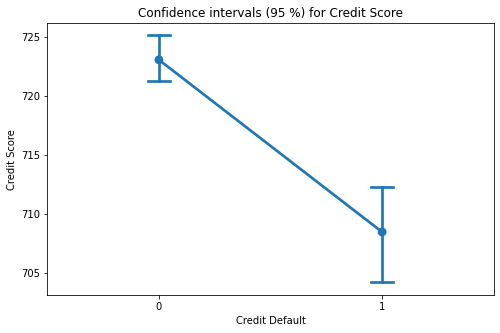

In [463]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Credit Score', data=credit_score_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –Ω–µ –ø–µ—Ä–µ–∫—Ä—ã–≤–∞—é—Ç—Å—è, –∑–Ω–∞—á–∏—Ç –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Credit Score –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ö–æ—Ä–æ—à–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

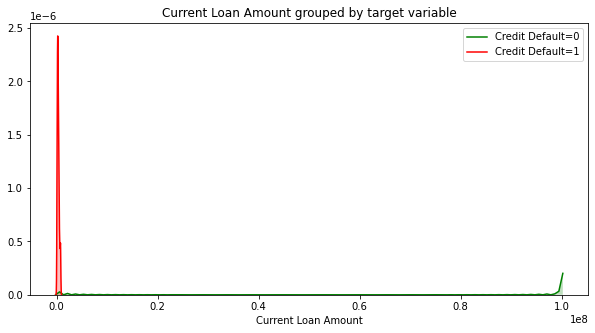

In [467]:
current_loan_with_target_s = df_train[['Current Loan Amount', TARGET_NAME]].sample(1000)
current_loan_s = current_loan_with_target_s['Current Loan Amount']
current_loan_target_0 = current_loan_s[current_loan_with_target_s[TARGET_NAME] == 0]
current_loan_target_1 = current_loan_s[current_loan_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(current_loan_target_0, shade=True, label='Credit Default=0', color='g')
sns.kdeplot(current_loan_target_1, shade=True, label='Credit Default=1', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target variable')
plt.show()

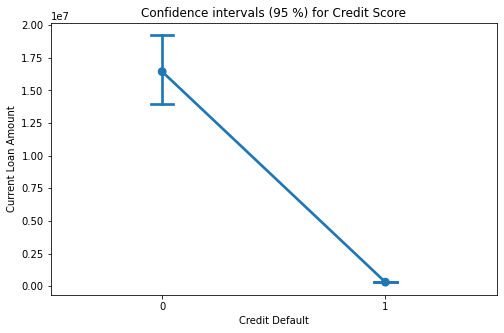

In [468]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount', data=current_loan_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

In [469]:
df_train1=df_train.loc[df_train['Annual Income'].notnull()]

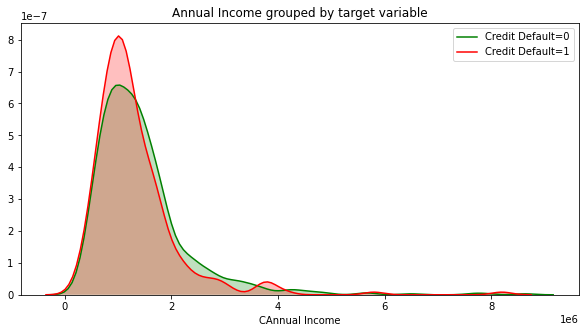

In [470]:
income_with_target_s = df_train1[['Annual Income', TARGET_NAME]].sample(1000)
income_s = income_with_target_s['Annual Income']
income_target_0 = income_s[income_with_target_s[TARGET_NAME] == 0]
income_target_1 = income_s[income_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(income_target_0, shade=True, label='Credit Default=0', color='g')
sns.kdeplot(income_target_1, shade=True, label='Credit Default=1', color='r')

plt.xlabel('Annual Income')
plt.title('Annual Income grouped by target variable')
plt.show()

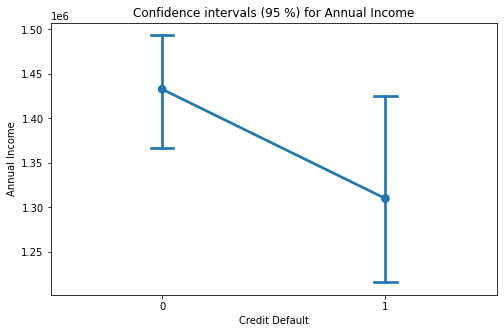

In [471]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Annual Income', data=income_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual Income')
plt.show()

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏—è –ø—Ä–∞–∑–Ω–∞–∫–∞ –≤ –∑–∞–≤–∏—Å–æ–º–æ—Å—Ç–∏ –æ—Ç –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–µ—Ä–µ–∫—Ä—ã–≤–∞—é—Ç—Å—è, –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π

In [401]:
df_train['ID'] = df_train.index.tolist()

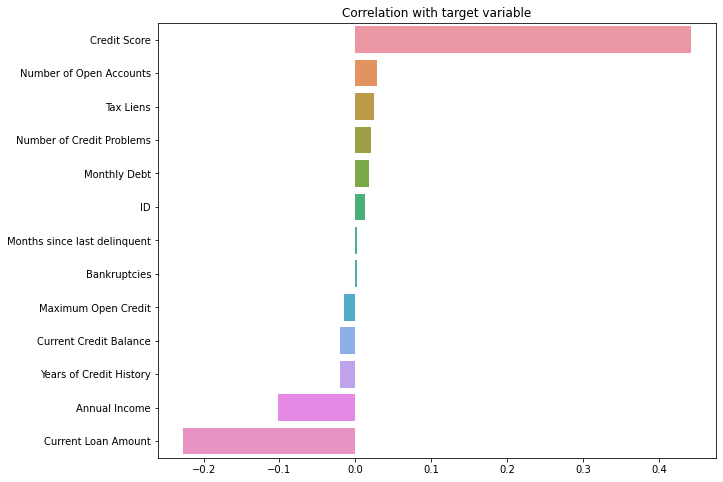

In [402]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

# –î–∞–ª—å—à–µ –ø–æ–∫–∞ –Ω–µ —É—Å–ø–µ–ª.....

In [163]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0

In [164]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [167]:
df_train.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

In [182]:
pd.crosstab(df_train['Tax Liens'], df_train['Credit Default'])

Credit Default     0     1
Tax Liens                 
0.0             5301  2065
1.0               59    24
2.0               15    15
3.0                5     5
4.0                3     3
5.0                1     1
6.0                2     0
7.0                1     0

In [ ]:
pd.crosstab(df_train['Tax Liens'], df_train['Credit Default'])

In [173]:
pd.crosstab(df_train['Number of Credit Problems'], df_train['Credit Default'])

Credit Default                0     1
Number of Credit Problems            
0.0                        4654  1815
1.0                         641   241
2.0                          60    33
3.0                          21    14
4.0                           3     6
5.0                           3     4
6.0                           4     0
7.0                           1     0

In [174]:
pd.crosstab(df_train['Home Ownership'], df_train['Credit Default'])

Credit Default     0     1
Home Ownership            
Have Mortgage     10     2
Home Mortgage   2721   916
Own Home         455   192
Rent            2201  1003

<AxesSubplot:xlabel='Months since last delinquent'>

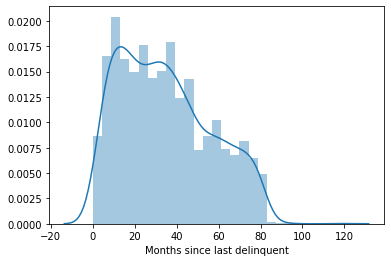

In [191]:
sns.distplot(df_train.loc[df_train['Months since last delinquent'].notnull(), 'Months since last delinquent'])

In [192]:
pd.crosstab(df_train['Bankruptcies'], df_train['Credit Default'])

Credit Default     0     1
Bankruptcies              
0.0             4782  1878
1.0              569   217
2.0               20    11
3.0                5     2
4.0                1     1

In [193]:
pd.crosstab(df_train['Term'], df_train['Credit Default'])

Credit Default     0     1
Term                      
Long Term       1128   816
Short Term      4259  1297

In [175]:
pd.crosstab(df_train['Months since last delinquent'], df_train['Credit Default'])

Credit Default                 0   1
Months since last delinquent        
0.0                           12   6
1.0                           15  11
2.0                           18   7
3.0                           22   8
4.0                           16  15
...                           ..  ..
84.0                           0   1
86.0                           0   1
91.0                           1   0
92.0                           1   0
118.0                          1   0

[89 rows x 2 columns]

<AxesSubplot:xlabel='Annual Income'>

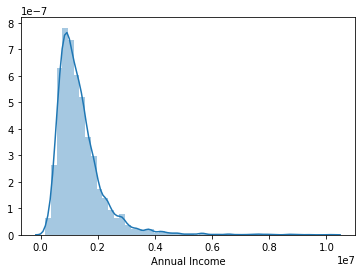

In [96]:
sns.distplot(df_train[pd.notnull(df_train['Annual Income'])]['Annual Income'])

C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binne

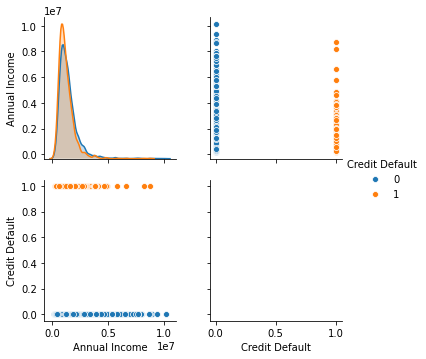

In [176]:
sns.pairplot(df_train.loc[:, ['Annual Income', 'Credit Default']], hue='Credit Default')

<AxesSubplot:xlabel='Annual Income'>

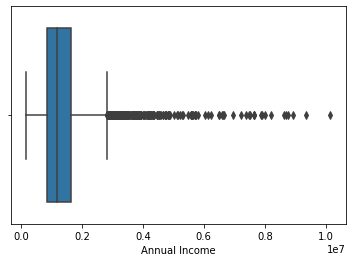

In [180]:
sns.boxplot(df_train['Annual Income'])

In [181]:
df_train['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [97]:
df_defaul1=df_train[df_train['Credit Default']==1]
df_defaul0=df_train[df_train['Credit Default']==0]
sns.distplot(df_defaul1[pd.notnull(df_defaul1['Credit Score'])]['Credit Score'])


In [ ]:
sns.distplot(df_defaul0[pd.notnull(df_defaul0['Credit Score'])]['Credit Score'])

In [98]:
df_defaul0=df_train[df_train['Credit Default']==0]

<AxesSubplot:xlabel='Credit Score'>

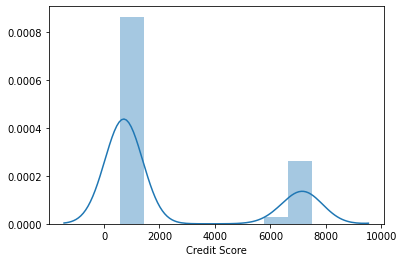

In [99]:
sns.distplot(df_defaul1[pd.notnull(df_defaul1['Credit Score'])]['Credit Score'])


In [100]:
df_defaul0['Credit Score'].std()

25.412545225110982

<AxesSubplot:xlabel='Credit Score'>

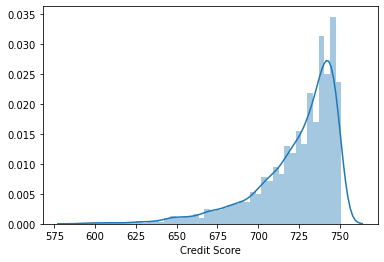

In [101]:
sns.distplot(df_defaul0[pd.notnull(df_defaul0['Credit Score'])]['Credit Score'])

C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mvideo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binne

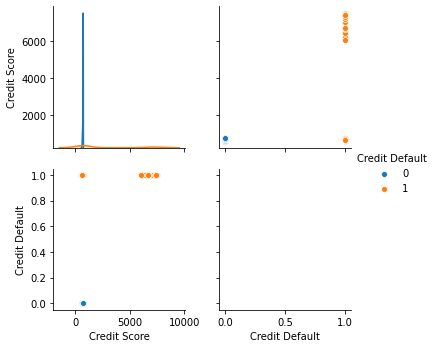

In [102]:
sns.pairplot(df_train.loc[:, ['Credit Score', 'Credit Default']], hue='Credit Default')

In [103]:
df_train.corr()

Annual Income  Tax Liens  \
Annual Income                      1.000000   0.066245   
Tax Liens                          0.066245   1.000000   
Number of Open Accounts            0.188524  -0.005360   
Years of Credit History            0.186531   0.009109   
Maximum Open Credit                0.062218  -0.002410   
Number of Credit Problems         -0.015407   0.595339   
Months since last delinquent      -0.101787   0.052446   
Bankruptcies                      -0.066877   0.057360   
Current Loan Amount                0.032082  -0.007835   
Current Credit Balance             0.386481  -0.010195   
Monthly Debt                       0.584819   0.027211   
Credit Score                      -0.037832   0.010581   
Credit Default                    -0.101375   0.024368   

                              Number of Open Accounts  \
Annual Income                                0.188524   
Tax Liens                                   -0.005360   
Number of Open Accounts                      1.000000   
Years of Credit History                      0.144819   
Maximum Open Credit                          0.023897   
Number of Credit Problems                   -0.017813   
Months since last delinquent                -0.032740   
Bankruptcies                                -0.019130   
Current Loan Amount                          0.001346   
Current Credit Balance                       0.267325   
Monthly Debt                                 0.413904   
Credit Score                                 0.016095   
Credit Default                               0.028884   

                              Years of Credit History  Maximum Open Credit  \
Annual Income                                0.186531             0.062218   
Tax Liens                                    0.009109            -0.002410   
Number of Open Accounts                      0.144819             0.023897   
Years of Credit History                      1.000000             0.029247   
Maximum Open Credit                          0.029247             1.000000   
Number of Credit Problems                    0.071259            -0.004750   
Months since last delinquent                -0.015375            -0.003849   
Bankruptcies                                 0.085699            -0.011650   
Current Loan Amount                          0.010623            -0.002334   
Current Credit Balance                       0.217856             0.088090   
Monthly Debt                                 0.191978             0.010197   
Credit Score                                -0.015683            -0.009136   
Credit Default                              -0.020567            -0.014275   

                              Number of Credit Problems  \
Annual Income                                 -0.015407   
Tax Liens                                      0.595339   
Number of Open Accounts                       -0.017813   
Years of Credit History                        0.071259   
Maximum Open Credit                           -0.004750   
Number of Credit Problems                      1.000000   
Months since last delinquent                   0.139905   
Bankruptcies                                   0.730751   
Current Loan Amount                           -0.008596   
Current Credit Balance                        -0.124137   
Monthly Debt                                  -0.042252   
Credit Score                                  -0.018473   
Credit Default                                 0.020088   

                              Months since last delinquent  Bankruptcies  \
Annual Income                                    -0.101787     -0.066877   
Tax Liens                                         0.052446      0.057360   
Number of Open Accounts                          -0.032740     -0.019130   
Years of Credit History                          -0.015375      0.085699   
Maximum Open Credit                              -0.003849     -0.011650   
Number of Credit Problems                 

### –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö

In [104]:
len(df_train) - df_train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [105]:
df_train.loc[df_train['Annual Income'].isnull(), 'Annual Income'] = df_train['Annual Income'].median()

In [106]:
df_train.loc[df_train['Years in current job'].isnull(), 'Years in current job'] = 'unempoyed'

In [107]:
df_train=df_train.drop(['Months since last delinquent'], axis=1)

In [108]:
df_train.loc[df_train['Bankruptcies'].isnull(), 'Bankruptcies'] = random.choices([0.0,1.0,2.0,3.0,4.0],weights=[0.8, 0.1, 0.005, 0.001, 0.0005])[0]

In [109]:
df_train.loc[df_train['Credit Score']<755, 'Credit Score'] = 0

In [110]:
df_train.loc[df_train['Credit Score']>=755, 'Credit Score'] = 1

In [111]:
df_train.loc[df_train['Credit Score'].isnull(), 'Credit Score'] = 2

In [112]:
pd.crosstab(df_train['Credit Score'], df_train['Credit Default'])

Credit Default     0     1
Credit Score              
0.0             4359  1184
1.0                0   400
2.0             1028   529

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   Years in current job       7500 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

In [114]:
df_train['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

### –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤

In [115]:
for colname in ['Tax Liens','Home Ownership', 'Years in current job', 'Purpose', 'Term', 'Number of Credit Problems', 'Bankruptcies', 'Credit Score']:
    df_train[colname] = df_train[colname].astype(str)

In [116]:
df_train.dtypes

Home Ownership                object
Annual Income                float64
Years in current job          object
Tax Liens                     object
Number of Open Accounts      float64
Years of Credit History      float64
Maximum Open Credit          float64
Number of Credit Problems     object
Bankruptcies                  object
Purpose                       object
Term                          object
Current Loan Amount          float64
Current Credit Balance       float64
Monthly Debt                 float64
Credit Score                  object
Credit Default                 int64
dtype: object

In [117]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years     2332
2 years        705
3 years        620
< 1 year       563
5 years        516
1 year         504
4 years        469
6 years        426
7 years        396
unemployed     371
8 years        339
9 years        259
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
****************************************************************************************************

Number of Credit Problems

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name

### –í—ã–¥–µ–ª–∏—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –≤ –æ—Ç–¥–µ–ª–Ω—ã–π DF

In [118]:
df_train_target = df_train.loc[:, ['Credit Default']]


In [119]:
df_train=df_train.drop(['Credit Default'], axis=1)

In [134]:
df_train_target.to_csv(PREP_DATASET_TRARGET_PATH, index=False, encoding='utf-8')

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [120]:
#df_train['ID'] = df.index.tolist()

In [121]:
for cat_colname in df_train.select_dtypes(include='object').columns[1:]:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[cat_colname], prefix=cat_colname)], axis=1)

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Home Ownership                   7500 non-null   object 
 1   Annual Income                    7500 non-null   float64
 2   Years in current job             7500 non-null   object 
 3   Tax Liens                        7500 non-null   object 
 4   Number of Open Accounts          7500 non-null   float64
 5   Years of Credit History          7500 non-null   float64
 6   Maximum Open Credit              7500 non-null   float64
 7   Number of Credit Problems        7500 non-null   object 
 8   Bankruptcies                     7500 non-null   object 
 9   Purpose                          7500 non-null   object 
 10  Term                             7500 non-null   object 
 11  Current Loan Amount              7500 non-null   float64
 12  Current Credit Balan

In [123]:
categorical_columns = df_train.columns[df_train.dtypes == 'object']

In [124]:
categorical_columns

Index(['Home Ownership', 'Years in current job', 'Tax Liens',
       'Number of Credit Problems', 'Bankruptcies', 'Purpose', 'Term',
       'Credit Score'],
      dtype='object')

In [125]:
df_train = df_train.drop(categorical_columns, axis=1)

In [126]:
df_train

Annual Income  Number of Open Accounts  Years of Credit History  \
0          482087.0                     11.0                     26.3   
1         1025487.0                     15.0                     15.3   
2          751412.0                     11.0                     35.0   
3          805068.0                      8.0                     22.5   
4          776264.0                     13.0                     13.6   
...             ...                      ...                      ...   
7495       402192.0                      3.0                      8.5   
7496      1533984.0                     10.0                     26.5   
7497      1878910.0                     12.0                     32.1   
7498      1168386.0                     21.0                     26.5   
7499      1168386.0                      8.0                      9.4   

      Maximum Open Credit  Current Loan Amount  Current Credit Balance  \
0                685960.0           99999999.0                 47386.0   
1               1181730.0             264968.0                394972.0   
2               1182434.0           99999999.0                308389.0   
3                147400.0             121396.0                 95855.0   
4                385836.0             125840.0                 93309.0   
...                   ...                  ...                     ...   
7495             107866.0             129360.0                 73492.0   
7496             686312.0             444048.0                456399.0   
7497            1778920.0           99999999.0                477812.0   
7498            1141250.0             615274.0                476064.0   
7499             480832.0              26928.0                288192.0   

      Monthly Debt  Years in current job_1 year  \
0           7914.0                            0   
1          18373.0                            0   
2          13651.0                            0   
3          11338.0                            0   
4           7180.0                            0   
...            ...                          ...   
7495        1900.0                            0   
7496       12783.0                            1   
7497       12479.0                            0   
7498       37118.0                            0   
7499        9061.0                            0   

      Years in current job_10+ years  Years in current job_2 years  ...  \
0                                  0                             0  ...   
1                                  1                             0  ...   
2                                  0                             0  ...   
3                                  0                             0  ...   
4                                  0                             0  ...   
...                              ...                           ...  ...   
7495                               0                             0  ...   
7496                               0                             0  ...   
7497                               0                             0  ...   
7498                               0                             0  ...   
7499                               0                             0  ...   

      Purpose_renewable energy  Purpose_small business  Purpose_take a trip  \
0                            0                       0                    0   
1                            0                       0                    0   
2                            0                       0                    0   
3                            0                       0                    0   
4                            0                       0                    0   
...                        ...                     ...                  ...   
7495                         0                       0                    0   
7496                         0                       0                    0   
7497           

In [128]:
df_train.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')

### –†–∞–±–∏–µ–Ω–∏–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞-—Å–µ—Ç–∞ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é –≤—ã–±–æ—Ä–∫–∏

In [7]:
df_train_prep = pd.read_csv(PREP_DATASET_PATH) 
df_train_target_prep=pd.read_csv(PREP_DATASET_TRARGET_PATH) 

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_train_prep, df_train_target_prep, test_size=0.25)

In [89]:
def quality (y_train, y_test):
    print ('precision ',precision_score (y_train, y_test) )
    print('recall ',recall_score (y_train, y_test) )
    print ('f1_score ', f1_score(y_train, y_test) )

### –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf1 = RandomForestClassifier(n_estimators=100)


In [54]:
clf1 = clf1.fit(X_train, np.ravel(y_train))

In [55]:
y_result1=clf1.predict(X_test)

In [90]:
quality(y_result1, y_test)

precision  0.31529850746268656
recall  0.7412280701754386
f1_score  0.4424083769633507


### –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf2 = GradientBoostingClassifier (learning_rate=0.1,max_depth=10)
clf2.fit(X_train, np.ravel(y_train))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:

y_result2=clf2.predict(X_test)


In [140]:
quality(y_result2, y_test)

precision  0.3562992125984252
recall  0.6557971014492754
f1_score  0.461734693877551


### Voting Classifier

In [92]:
#—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [94]:
scaler = StandardScaler()

In [95]:
scaler.fit(df_train_prep)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
X=scaler.transform(df_train_prep)

In [98]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df_train_target_prep, test_size=0.25)

In [116]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1, max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier (learning_rate=0.1,max_depth=50)

eclf = VotingClassifier(estimators=[('lr', clf1),
                                    ('rf', clf2), 
                                    ('gnb', clf3), 
                                    ('gb',clf4)], 
                                      voting='hard')

eclf = eclf.fit(X_train, np.ravel(y_train))

C:\Users\mvideo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
y_result3=eclf.predict(X_test)

In [118]:
quality(y_result3, y_test)

precision  0.33070866141732286
recall  0.8038277511961722
f1_score  0.4686192468619247


### LogisticRegression

In [108]:
clf1 = LogisticRegression(random_state=1, max_iter=1000)

In [109]:
clf1.fit(X_train, np.ravel(y_train))

C:\Users\mvideo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_result4=clf1.predict(X_test)

In [112]:
quality(y_result4, y_test)

precision  0.28346456692913385
recall  0.8
f1_score  0.4186046511627907


### Cross-Validation + Gradient Boosting

In [153]:
X=df_train_prep

In [154]:
y=df_train_target_prep

In [155]:
clf=GradientBoostingClassifier (loss='exponential', learning_rate=0.1,max_depth=50)
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, np.ravel(y), cv=cv, scoring='f1')


array([0.4769688 , 0.46024465, 0.48744939, 0.46117274, 0.44607843])

In [156]:
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=50,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)